In [1]:
# Chapter 6

In [2]:
# Classification with KNN

In [3]:
from sklearn.datasets import load_iris
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

In [4]:
iris = load_iris()

In [5]:
X = iris.data
Y = iris.target

In [6]:
XTrain, XTest, YTrain, YTest =\
ms.train_test_split(X,Y, test_size = 0.3, random_state = 7)

In [7]:
# With KNN we need to find the appropriate value of k. and we can do this 
# with the help of GridSearchCV

In [8]:
k_neighbours = list(range(1,21,2)) # list of even numbers as candidates
n_grid = [{'n_neighbors':k_neighbours}]

In [9]:
model = neighbors.KNeighborsClassifier()

In [10]:
# We are performing cross-validation with 10 folds in our training data

In [11]:
cv_knn = GridSearchCV(estimator = model, param_grid =  n_grid,\
                     cv = ms.KFold(n_splits=10))

In [12]:
cv_knn.fit(XTrain, YTrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
best_k = cv_knn.best_params_['n_neighbors']

In [14]:
print('The best parameter is k = {0}'.format(best_k))

The best parameter is k = 11


In [15]:
# For visualisation purposes we will concentrate on only two features:
# sepal width and petal lenght

knnclf = neighbors.KNeighborsClassifier(n_neighbors=best_k)

knnclf.fit(XTrain[:, 2:4], YTrain) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [16]:
y_pred = knnclf.predict(XTest[:, 2:4])

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(YTest, y_pred)

array([[12,  0,  0],
       [ 0, 14,  2],
       [ 0,  2, 15]])

In [19]:
# 4 instances have been missclassified. 

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(YTest, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.88      0.88      0.88        16
          2       0.88      0.88      0.88        17

avg / total       0.91      0.91      0.91        45



In [22]:
# Classification with Logistic Regression

In [23]:
import pandas as pd

In [24]:
bc = pd.read_csv('../data/breast-cancer-wisconsin.csv')

In [25]:
# Let's clean up wrongly formatted data

In [26]:
bc['bare_nucleoli'] = pd.to_numeric(bc['bare_nucleoli'], errors='coerce')

In [27]:
# Remove Null values

In [28]:
bc = bc.dropna()

In [29]:
# convert class to categorical value

In [30]:
bc['class'] = bc['class'].astype('category')
bc['class'].describe()

count     683
unique      2
top         2
freq      444
Name: class, dtype: int64

In [31]:
# Let's prepare our data by separating the labels from the rest of the dataset

In [32]:
X = bc.drop(['class'], axis=1)

In [33]:
X = X.values

In [34]:
Y_raw = bc['class'].values

In [35]:
# Let's change the labels to be 0 or 1 using LabelEncoder

In [36]:
from sklearn import preprocessing

In [37]:
label_enc = preprocessing.LabelEncoder()
label_enc.fit(Y_raw)

LabelEncoder()

In [38]:
Y = label_enc.transform(Y_raw)

In [39]:
import sklearn.model_selection as ms
import numpy as np

In [40]:
XTrain, XTest, YTrain, YTest = \
ms.train_test_split(X,Y, test_size=0.3, random_state = 1)

In [54]:
from sklearn.linear_model import LogisticRegression

In [42]:
pen_val = ['l1', 'l2']

In [55]:
C_val = 2. ** np.arange(-5, 10, step = 2)

In [56]:
grid_s = [{'C': C_val, 'penalty': pen_val}]

In [57]:
model = LogisticRegression()

In [58]:
cv_logr = GridSearchCV(estimator = model, param_grid = grid_s, \
                       cv = ms.KFold(n_splits = 10))

In [59]:
cv_logr.fit(XTrain, YTrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': array([  3.12500e-02,   1.25000e-01,   5.00000e-01,   2.00000e+00,
         8.00000e+00,   3.20000e+01,   1.28000e+02,   5.12000e+02])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [60]:
best_c = cv_logr.best_params_['C']
best_penalty = cv_logr.best_params_['penalty']

In [61]:
print('''The best parameters are: cost={0} and penalty={1}'''.format(
    best_c,
    best_penalty))

The best parameters are: cost=0.5 and penalty=l1


In [62]:
# Now we can create an instance of the logistic regression model
# using the parameters obtained

In [63]:
b_clf = LogisticRegression(C=best_c,penalty=best_penalty)

In [64]:
b_clf.fit(XTrain,YTrain)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
predict = b_clf.predict(XTest)

In [66]:
y_proba = b_clf.predict_proba(XTest)

In [69]:
print(b_clf.score(XTest, YTest))

0.960975609756


In [72]:
print(b_clf.coef_)

[[ -2.14888714e-06   1.60892351e-01   2.75002179e-01   3.85382688e-01
    3.82727013e-02  -3.59244860e-02   3.25862897e-01   9.29287848e-02
    2.60637880e-01   1.87088647e-01]]


In [75]:
# Let's calculate the odds rations
print(np.exp(b_clf.coef_))

[[ 0.99999785  1.17455852  1.31653354  1.47017683  1.03901453  0.96471314
   1.38522544  1.09738358  1.29775764  1.20573416]]


In [77]:
# Let's look at the ROC Curve

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

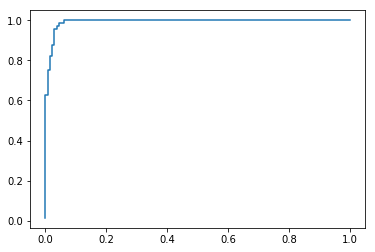

In [83]:
fpr,tpr, threshold = roc_curve(YTest, y_proba[:,1])
plt.plot(fpr,tpr)

In [84]:
print(auc(fpr,tpr))

0.992272347536
